ETNP_pyompa_for_WOD_USER_FRIENDLY_BASE_VERSION

Written by Natalya Evans

This script is built to perform an eOMP on the ETNP ODZ data from the WOD18 to determine variations in the stoichiometry of anaerobic remineralization. This stoichiometry can then be used to solve for the percent of nitrite re-oxidation. It was written during revisions for the paper "Prolific nitrite re-oxidation across the Eastern Tropical North Pacific Ocean" (https://www.essoar.org/doi/10.1002/essoar.10511252.1). 

This version of the code is significant because I designed it as a go-to template for performing water mass analysis with pyompa. It is designed to run in a google drive folder, where it reads in csv files from that same folder and writes a csv output to that folder. Other scripts for this project are designed to use Github, which allows them to access a repository and have superior version control. Unfortunately, this also adds Github familiarity as a potential barrier for new users. This code only requires setting up a google drive folder, which we anticipate may be more intuitive. 

For this code to run on a different computer in google colab, follow the steps below:

1. Replace te beginning of the URL that says "https://github.com/" with "https://colab.research.google.com/github/". This step should open the notebook in colab, if your google account has that set up. Some institutions don't have colab enabled, but a person gmail should.

2. Add a copy of this file to your google drive with the "Copy to Drive" button on top. Locate the folder where the copy was saved by going to "File" -> "Locate in Drive". It will likely be in the folder called "Colab Notebooks".

3. Put the csv files "WOD_ETNP_pyompa_2_reduced.csv" and "ETNP_pyompa_ref_values.csv" into this folder. These consist of the data to analyze and the endmembers, appropriately.

4. Adjust the working folder with the line that starts with "%cd ". This changes the directory. Everything after the entry "MyDrive" is a subfolder, so if this file is in the folder Colab Notebooks, then change this to say 
%cd "/content/drive/MyDrive/Colab Notebooks"

5. 



Comment this more and put on github

In [2]:
# install pyompa to do the analysis and gsw for helpful interconversions
!pip install pyompa==0.4.2.0
!pip install gsw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyompa: filename=pyompa-0.4.2.0-py3-none-any.whl size=27944 sha256=2569c6f5a903e98909ae1eab70b13710a837b8c0421de7bc7198defa45d2c471
  Stored in directory: /root/.cache/pip/wheels/ee/bf/52/4e3078948c0fc6eacfffc76536a754087fb12697781430ecec
Successfully built pyompa
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.3 MB/s 


Mount the google drive folder


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !pwd # show working directory
%cd "/content/drive/MyDrive/importCSV"
!ls
#change path


/content/drive/MyDrive/Emma Senior Thesis/importCSV
 bogradTest.csv
 bogradTest.gsheet
 bogradWaterTypes.csv
 lawrenceAnalysis.csv
 lawrenceSI.csv
 lawrenceTest3.csv
 lawrenceTestAnalysis.csv
 lawrenceTest.csv
 lawrenceTest.gsheet
 modLawrenceSI.csv
 newFormattedDataOregonOrig.csv
'newOregonMoffettAdd(umol_kg).csv+oregonOrig(umol_kg).csv'
'newOregonMoffettAdd(umol_L).csv'
'newOregonMoffettAdd(umol_L).csv+oregonOrig(umol_L).csv'
'noSigFigsNewOregonMoffettAdd(umol_kg).csv+oregonOrig(umol_kg).csv'
'oldNewOregonMoffettAdd(umol_kg).csv+oregonOrig(umol_kg).csv'
'oregonOrig(umol_L).csv'
'Untitled spreadsheet.gsheet'


In [5]:
import scipy.io
from scipy.io import loadmat
import pandas as pd
import numpy as np


Load the data to analyze

In [6]:
#change this
data_df = pd.read_csv("newOregonMoffettAdd(umol_kg).csv+oregonOrig(umol_kg).csv") # read in the data to be analyzed. This data file already has the values outside of the analysis region removed
data_df = data_df[(data_df['Longitude/(ºW)']>-125) & (data_df['Pot Density/kg m-3']>25.5)]


Define the endmembers. Column headers here have to match those of the data being analyzed

In [7]:
#change this
endmembers_df_read = pd.read_csv("lawrenceTest3.csv")

In [8]:
endmembers_df_read.head() # check it worked #make sure O2 is here

,Water mass,Temperature,Salinity (practical),Phosphate,Nitrate,Silicate,Oxygen/μmol kg-1
0,AABW0,0.07,34.87,2.26,32.46,128.23,216.23
1,AAIW0,5.04,34.39,1.67,23.99,11.51,272.31
2,AAIW1,4.47,34.40,1.99,28.54,20.43,231.45
3,ENPCW0,15.99,34.80,0.32,3.51,3.54,213.72
4,ENPCW1,8.55,34.20,1.57,21.55,28.66,177.51


Remove the endmembers we won't be using

In [9]:
#pulls out which rows you use

#remove tCO2

#make sure O2 is here

# endmembers_df = endmembers_df_read.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]] # defines a new dataframe so we can cut and then adjust without re-reading in the data
endmembers_df = endmembers_df_read.iloc[[4, 12, 13, 17, 18, 23, 24, 27]] # defines a new dataframe so we can cut and then adjust without re-reading in the data

#updated end members 10/28

display(endmembers_df)# check that this selection is correct. When calling "head", only 5 rows will be displayed.

,Water mass,Temperature,Salinity (practical),Phosphate,Nitrate,Silicate,Oxygen/μmol kg-1
4,ENPCW1,8.550,34.20,1.570000,21.550000,28.660000,177.51000
12,NPIW1,7.150,34.02,1.190000,15.050000,25.260000,268.40000
13,NPIW2,4.540,34.12,2.520000,34.760000,77.910000,114.14000
17,PSUW0,6.130,32.71,1.210000,11.960000,19.720000,324.84000
18,PSUW1,4.430,33.60,2.280000,29.990000,50.070000,178.86000
23,13CW,13.410,34.85,1.987917,27.655428,21.496784,46.09238
24,NEPIW,9.470,34.68,2.658746,35.459681,38.683288,18.30931
27,TEST0,8.482,32.35,1.420000,14.890000,14.900000,205.00000


Define the pyompa parameters and run the eOMP analysis

In [10]:
import pyompa
from pyompa.endmemberpenaltyfunc import GeneralPenaltyFunc # this is specifically to have a penalty

# converted parameters contains the remineralization stoichiometries. Each group
# corresponds to a remineralization process, and in the ETNP ODZ, we have two: 
# aerobic and anaerobic remineralization. The names in the conversion ratio have
# to match the input data and the endmembers. Adding multiple entries within the
# "conversion ratios" setting enables flexible remineralization. In this case, I
# have two entries for both (an)aerobic remineralizations, meaning that both are
# flexible. Each remineralization also has an option called "always_positive", 
# which is used to determine if this remineralization can only be applied in the
# positive direction. For aerobic remineralization, if always_positive=True, 
# then the solver algorithm can only allow remineralization to occur. However,
# if always_positive=False, then both remineralization and nutrient assimilation
# can occur.

#can leave anaerobic (shelf paper Connelly)
convertedparamgroups = [
    pyompa.ConvertedParamGroup(
        groupname="aerobic_remin",
        #add O2, -170 here, -140 
        
        # conversion_ratios=[{"Phosphate": 1.0, "Nitrate": 14, "Silicate": 12, "Oxygen/μmol kg-1": -170},
        # {"Phosphate": 1.0, "Nitrate": 17, "Silicate": 48, "Oxygen/μmol kg-1": -140}],

        conversion_ratios=[{"Phosphate": 1.0, "Nitrate": 13, "Silicate": 13, "Oxygen/μmol kg-1": -120},
        {"Phosphate": 1.0, "Nitrate": 19, "Silicate": 48, "Oxygen/μmol kg-1": -170}],

        always_positive=False 
        )
    
    ,pyompa.ConvertedParamGroup(
       groupname="anaerobic_remin",
      #add O2 it is 0 here
       conversion_ratios=[
       {"Phosphate": 1.0, "Nitrate": -90, "Silicate": 13},
       {"Phosphate": 1.0, "Nitrate": -110, "Silicate": 48}],
       always_positive=True 
       )
]

# usage penalties are applied to prevent the algorithm from assigning a water 
# mass in specific conditions. These are most often spatially limiting. For 
# example, if a water mass is limited with regards to its latitude, longitude, 
# or potential density, but the eOMP solution includes this water mass outside 
# those bounds, a usage penalty can be applied. There are both soft and hard 
# penalties. I'm using a soft one below.

#usagepenaltywashere9/22

usage_penalty = { 
    "NEPIW": GeneralPenaltyFunc(
        spec={
            'Pot Density/kg m-3':
            {'type':'exp_density_default', 'lowerbound':26.2}})
    ,"13CW": GeneralPenaltyFunc(
        spec={
            'Pot Density/kg m-3':
            {'type':'exp_density_default', 'lowerbound':26}})

    }

# These are the weighting for each parameter.
#add O2, use -170
#CT and SA can be temp and salinity
paramweightings = {
    "Temperature": 12.0,
    "Salinity (practical)": 3.0,
    "Phosphate": 6.0,
    "Nitrate": 4.0,
    "Oxygen/μmol kg-1": 7.0,
    "Silicate": 2.0
}

# The settings command specifies the objects for each part of the pyompa. In 
# param_names, these are the names of the parameters that are being used in the
# pyompa. We then specify the weightings and the remineralization. Next, there 
# are two options for comparing this package with the matlab omp2 package 
# written by Mattias Tomczak and Johannes Karstensen. In pyompa, we typically 
# set "sumtooneconstraint" to True to enforce a hard mass constraint, then set
# standardize_by_watertypes" to False to ensure that changing water mass 
# endmembers does not vary the weightings. If you want this pyompa script to be
# backwards compatible, do the opposite of those two commands.

#add oxygen
settings = {
    "param_names": ["Temperature", "Salinity (practical)",
                    "Phosphate", "Nitrate", "Oxygen/μmol kg-1",
                    "Silicate"
                    ],
    "param_weightings": paramweightings,
    "convertedparam_groups": convertedparamgroups,
    #setting sumtooneconstraint to False replicates the behavior of the
    # MATLAB OMP implementation, which does not enforce mass conservation.
    # By default, sumtooneconstraint is True in pyompa.
    "sumtooneconstraint": True,
    #standardize_by_watertypes=True replicates the normalization behavior
    # of the MATLAB OMP implementation. By default, this is False.
    "standardize_by_watertypes": False}

#Run the analysis here. The analysis problem and solution is stored within the
# "Oregon_df_ompasoln" object.

Oregon_df_ompasoln = pyompa.OMPAProblem(
  obs_df = data_df,
  endmembername_to_usagepenaltyfunc=usage_penalty, #usage_penalty was deleted 9/22, reinstated 10/28
  **settings).solve(
      endmembers_df,
      endmember_name_column="Water mass")
  
# ** notation uses a python dictionary and maps the keys in that dict to the parameter names, shorthand parameter specs onto a dictionary

Adding penalty for NEPIW
Adding penalty for 13CW
Endmember-idx mapping is
 OrderedDict([('ENPCW1', [0]), ('NPIW1', [1]), ('NPIW2', [2]), ('PSUW0', [3]), ('PSUW1', [4]), ('13CW', [5]), ('NEPIW', [6]), ('TEST0', [7])])
params to use: ['Temperature', 'Salinity (practical)', 'Phosphate', 'Nitrate', 'Oxygen/μmol kg-1', 'Silicate']
param weighting: [12.  3.  6.  4.  7.  2.]
Matrix A:
Trying convertedvariable sign constraint: [1 1 1 1]
On example 0 to 282 out of 282
status: optimal
optimal value 24940.341607018287
Original weighted sum squares: 24829.562676231195
Post fix weighted sum squared: 24829.57359467476
Trying convertedvariable sign constraint: [-1 -1  1  1]
On example 0 to 282 out of 282
status: optimal
optimal value 460061.23457835685
Original weighted sum squares: 405203.28564794804
Post fix weighted sum squared: 405207.1331543381
On example 0 to 282 out of 282
status: optimal
optimal value 23579.121794514176
Original weighted sum squares: 23270.109791121657
Post fix weighted sum s


Load in plotting tools

In [11]:
from matplotlib import pyplot as plt
from pyompa import (plot_ompasoln_endmember_fractions,                       
                    plot_ompasoln_residuals,                                 
                    plot_ompasoln_endmember_usagepenalties)

Plot results

Water mass fractions and deltaP


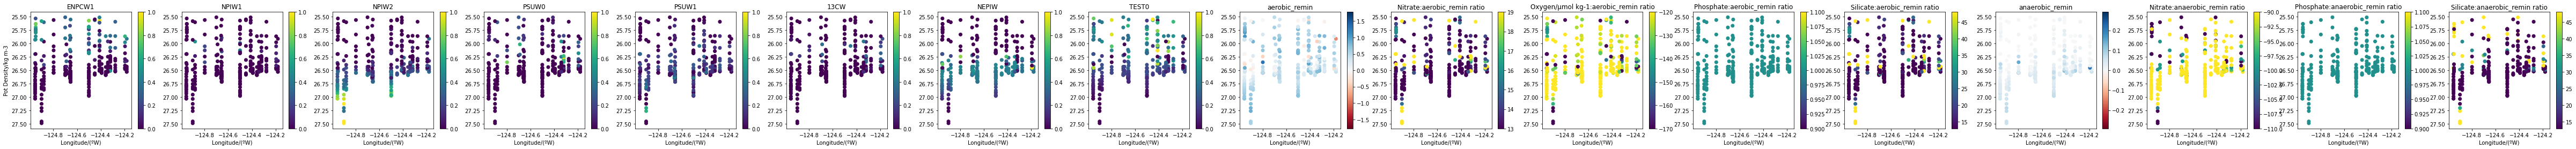

In [12]:
xaxis_colname="Longitude/(ºW)"

yaxis_colname = "Pot Density/kg m-3"
print("Water mass fractions and deltaP")
plot_ompasoln_endmember_fractions(ompa_soln=Oregon_df_ompasoln,
                                  xaxis_colname=xaxis_colname,
                                  yaxis_colname=yaxis_colname)


Plot residuals

Residuals


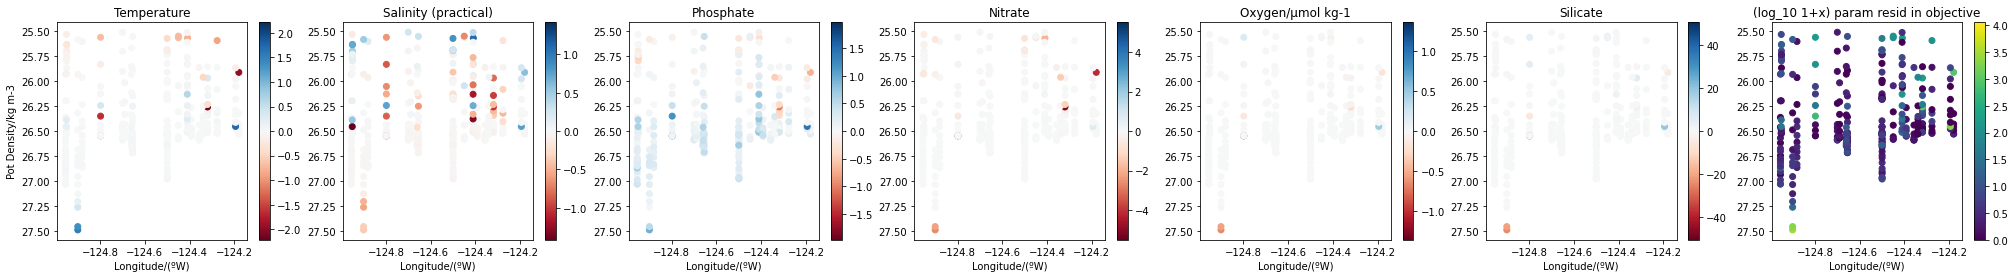

In [13]:
print("Residuals")
plot_ompasoln_residuals(ompa_soln=Oregon_df_ompasoln,
                        xaxis_colname=xaxis_colname,
                        yaxis_colname=yaxis_colname)

Output the pyompa sol'n as a csv into the drive folder this script currently is in. Then, we're done!




In [14]:
from collections import OrderedDict

ORIG_COLS_TO_INCLUDE = list(data_df.columns.values) # all of the columns. A subset can be used instead if so desired.
Oregon_df_ompasoln.export_to_csv(
    csv_output_name="lawrenceTestAnalysis.csv",
    orig_cols_to_include=ORIG_COLS_TO_INCLUDE)



writing to lawrenceTestAnalysis.csv


In [15]:
Oregon_df_ompasoln.endmember_names[6]

'NEPIW'

   Water mass  Temperature  Salinity (practical)  Phosphate    Nitrate  \
4      ENPCW1        8.550                 34.20   1.570000  21.550000   
12      NPIW1        7.150                 34.02   1.190000  15.050000   
13      NPIW2        4.540                 34.12   2.520000  34.760000   
17      PSUW0        6.130                 32.71   1.210000  11.960000   
18      PSUW1        4.430                 33.60   2.280000  29.990000   
23       13CW       13.410                 34.85   1.987917  27.655428   
24      NEPIW        9.470                 34.68   2.658746  35.459681   
27      TEST0        8.482                 32.35   1.420000  14.890000   

     Silicate  Oxygen/μmol kg-1  
4   28.660000         177.51000  
12  25.260000         268.40000  
13  77.910000         114.14000  
17  19.720000         324.84000  
18  50.070000         178.86000  
23  21.496784          46.09238  
24  38.683288          18.30931  
27  14.900000         205.00000  


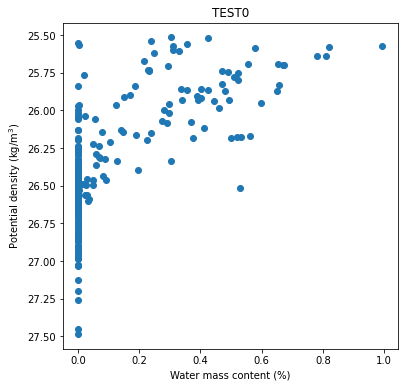

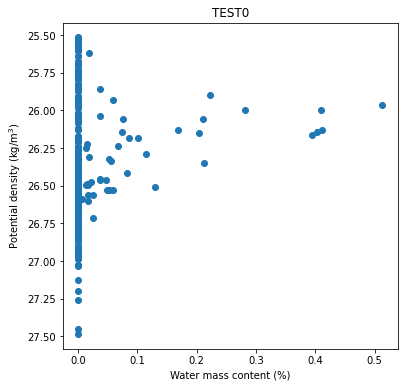

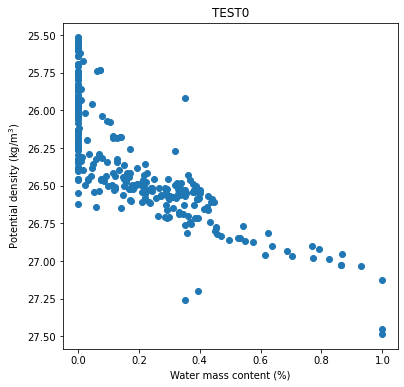

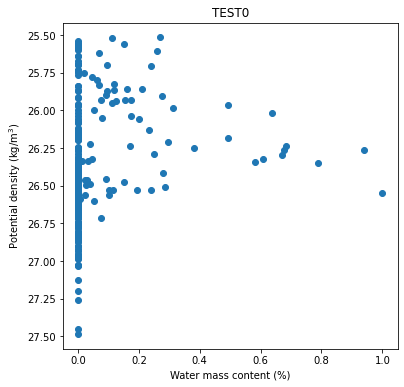

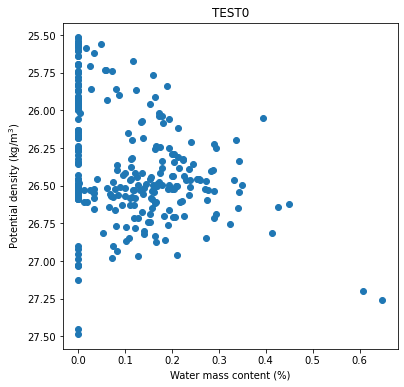

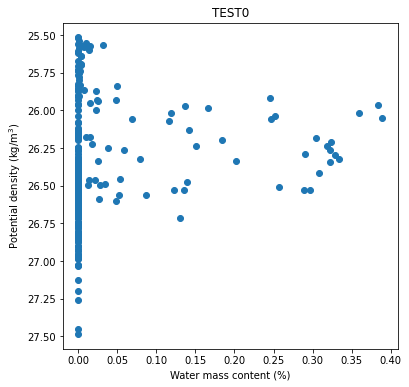

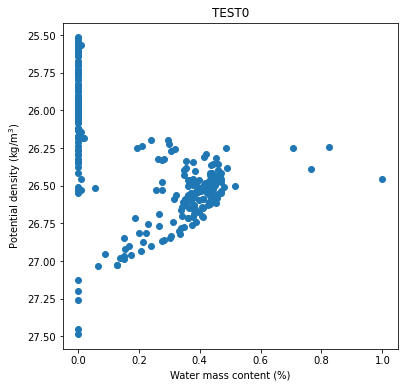

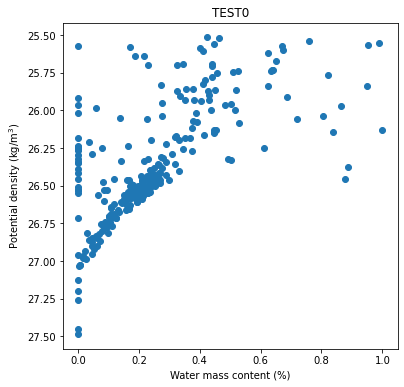

In [44]:
endmembers_df1 = endmembers_df.reset_index()
print(endmembers_df)
for i in range(len(endmembers_df.index)): 
  fig = plt.figure(figsize=(6, 6))
  plt.plot(Oregon_df_ompasoln.endmember_fractions[:,i],Oregon_df_ompasoln.obs_df['Pot Density/kg m-3'],'o')
  plt.xlabel('Water mass content (%)')
  plt.ylabel('Potential density (kg/m$^3$)')
  plt.gca().invert_yaxis()
  plt.title('TEST0')

   Water mass  Temperature  Salinity (practical)  Phosphate    Nitrate  \
4      ENPCW1        8.550                 34.20   1.570000  21.550000   
12      NPIW1        7.150                 34.02   1.190000  15.050000   
13      NPIW2        4.540                 34.12   2.520000  34.760000   
17      PSUW0        6.130                 32.71   1.210000  11.960000   
18      PSUW1        4.430                 33.60   2.280000  29.990000   
23       13CW       13.410                 34.85   1.987917  27.655428   
24      NEPIW        9.470                 34.68   2.658746  35.459681   
27      TEST0        8.482                 32.35   1.420000  14.890000   

     Silicate  Oxygen/μmol kg-1  
4   28.660000         177.51000  
12  25.260000         268.40000  
13  77.910000         114.14000  
17  19.720000         324.84000  
18  50.070000         178.86000  
23  21.496784          46.09238  
24  38.683288          18.30931  
27  14.900000         205.00000  


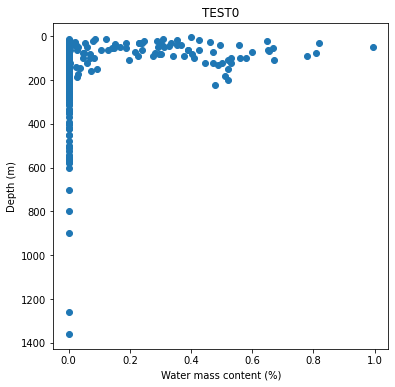

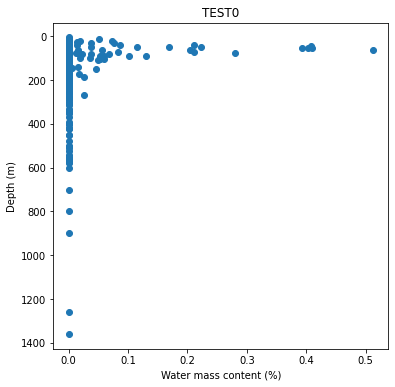

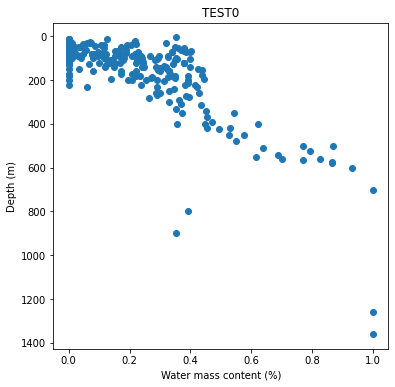

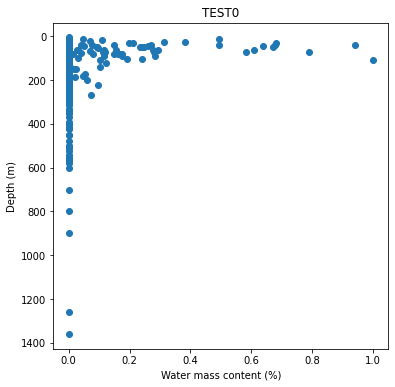

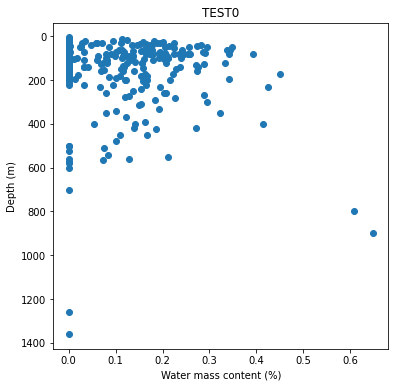

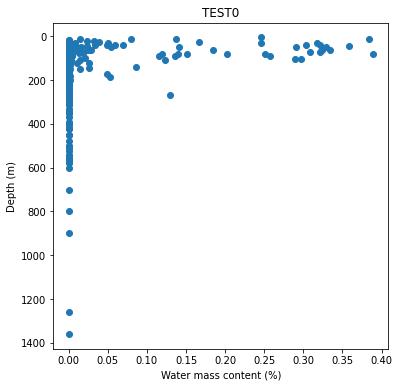

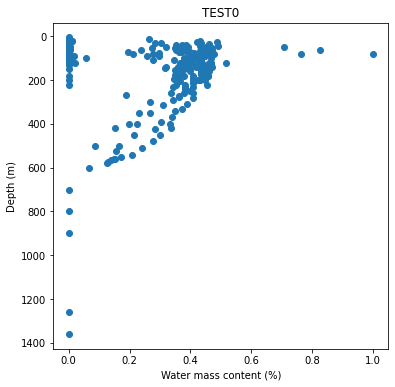

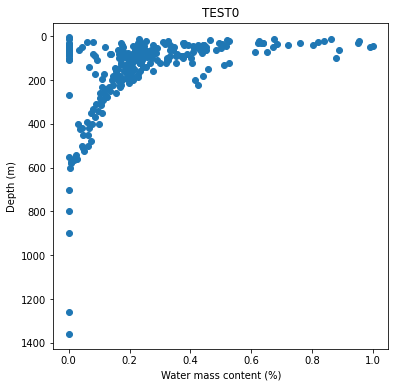

In [37]:
endmembers_df1 = endmembers_df.reset_index()
print(endmembers_df)
for i in range(len(endmembers_df.index)): 
  fig = plt.figure(figsize=(6, 6))
  plt.plot(Oregon_df_ompasoln.endmember_fractions[:,i],Oregon_df_ompasoln.obs_df['Depth/m'],'o')
  plt.xlabel('Water mass content (%)')
  plt.ylabel('Depth (m)')
  plt.gca().invert_yaxis()
  plt.title('TEST0')